In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

from HelperFunctions import plot_corr
%reload_ext autoreload
%autoreload 2

In [2]:
df=pd.read_csv('lean_df_2.csv',index_col='id')
treat_df=df.copy()

/home/auscheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
treat_df.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_bc_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,fico,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,open_revol_frac,good_acc_frac
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
137593428,5000.0,5000.0,5000.0,36 months,11.06,163.84,B,B3,Metal technician,10+ years,MORTGAGE,130000.0,Source Verified,Jul-2018,Current,debt_consolidation,782xx,TX,8.15,0.0,Apr-1998,3.0,33.0,NaN,0.0,2958.0,15.2,27.0,w,3940.85,3940.85,1343.810000,1343.81,1059.15,284.66,0.0,0.0,0.0,Feb-2019,163.84,Apr-2019,Mar-2019,0.0,41.0,Individual,NaN,NaN,NaN,0.0,0.0,2.0,1.0,2.0,6.0,92.0,11.0,1442.0,66.0,19500.0,3.0,1.0,6.0,19.9,0.0,0.0,114.0,165.0,0.0,0.0,3.0,1.0,4.0,7.0,0.0,0.0,10.0,73.1,0.0,0.0,120840.0,39240.0,702.0,0.666667,0.296296,0.037037,0.555556,0.500000,0.388889,0.833333,0.666667
60862476,12400.0,12400.0,12400.0,36 months,14.65,427.73,C,C5,Full time,10+ years,MORTGAGE,56000.0,Verified,Sep-2015,Charged Off,debt_consolidation,856xx,AZ,10.14,0.0,Oct-2005,1.0,76.0,NaN,0.0,16432.0,39.6,22.0,f,0.00,0.00,3781.630000,3781.63,2609.53,1172.10,0.0,0.0,0.0,Jun-2016,427.73,NaN,Mar-2019,0.0,76.0,Individual,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41500.0,NaN,NaN,NaN,54.2,0.0,0.0,110.0,119.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,0.0,2.0,95.2,0.0,0.0,505717.0,4000.0,702.0,0.454545,0.363636,0.181818,0.600000,0.666667,0.400000,0.600000,0.409091
79122776,2400.0,2400.0,2400.0,36 months,11.99,79.71,C,C1,Airport Operations,1 year,RENT,35000.0,Source Verified,May-2016,Fully Paid,debt_consolidation,113xx,NY,36.72,0.0,Jul-1999,0.0,38.0,NaN,0.0,5906.0,33.6,19.0,w,0.00,0.00,2860.718165,2860.72,2400.00,460.72,0.0,0.0,0.0,Mar-2019,0.16,NaN,Mar-2019,0.0,42.0,Individual,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,104.0,76.0,2.0,3963.0,61.0,17600.0,0.0,1.0,0.0,33.2,0.0,0.0,173.0,202.0,16.0,16.0,16.0,16.0,4.0,6.0,0.0,0.0,0.0,73.7,0.0,0.0,48451.0,30851.0,667.0,0.736842,0.263158,0.000000,0.857143,0.166667,0.214286,0.571429,0.526316
84434972,11000.0,11000.0,11000.0,36 months,11.49,362.69,B,B5,Parts Clerk,2 years,RENT,41600.0,Source Verified,Jul-2016,Current,debt_consolidation,232xx,VA,16.38,0.0,Sep-2010,0.0,NaN,NaN,0.0,9338.0,55.6,12.0,f,1418.39,1418.39,11580.020000,11580.02,9581.61,1998.41,0.0,0.0,0.0,Mar-2019,362.69,Apr-2019,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,2.0,0.0,1.0,15.0,83.0,3.0,3110.0,70.0,16800.0,1.0,0.0,5.0,59.1,0.0,0.0,70.0,61.0,8.0,8.0,8.0,5.0,0.0,4.0,0.0,0.0,2.0,100.0,0.0,0.0,36607.0,19807.0,687.0,0.750000,0.250000,0.000000,0.555556,0.800000,0.444444,0.555556,0.583333
126001563,10000.0,10000.0,10000.0,60 months,20.00,264.94,D,D4,Vet assistant,3 years,RENT,31200.0,Verified,Dec-2017,Current,debt_consolidation,982xx,WA,22.58,0.0,Feb-2003,2.0,51.0,NaN,0.0,476.0,10.8,19.0,w,8340.86,8340.86,3946.320000,3946.32,1659.14,2287.18,0.0,0.0,0.0,Mar-2019,264.94,Apr-2019,Mar-2019,0.0,51.0,Individua

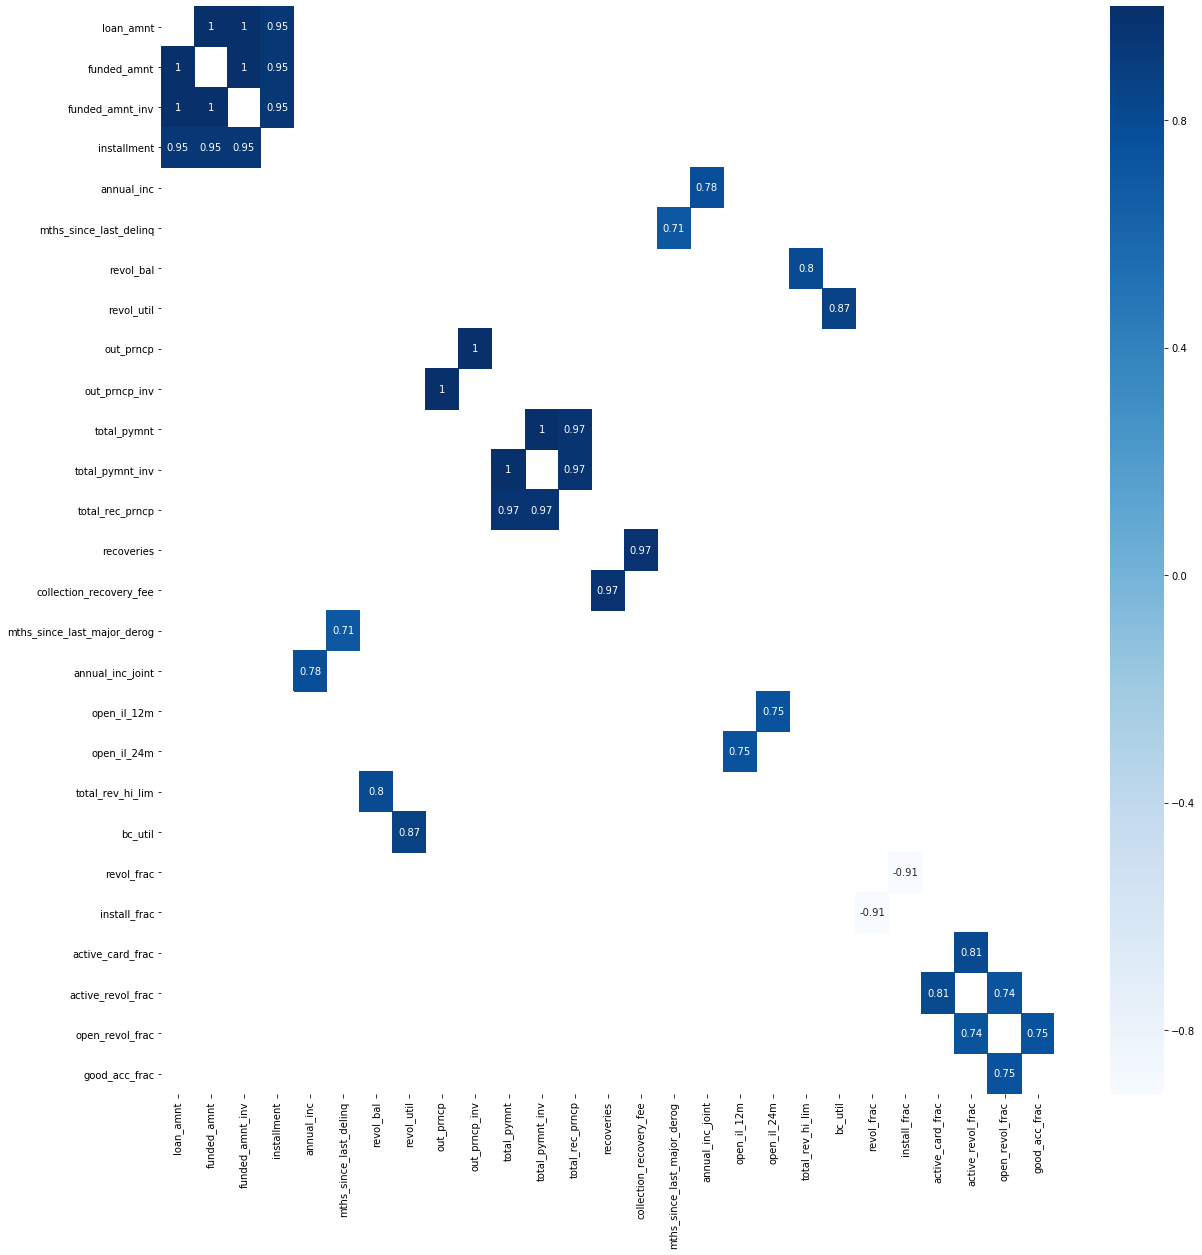

In [4]:
plot_corr(treat_df,threshold=0.7,size=20)

In [5]:
#### Removing any feature that are extremely highly correlated with other features
#### drop bc_util because it is included in revol_util and the fraction given by card_frac
#### drop out_prncp_inv <--- duplicate of out_prncp
#### drop total_pymnt_inv <--- duplicate of total_pymnt
#### drop collection_recovery_fee <--- duplicate of recoveries <--- rename as collection_recoveries
#### drop revol_bal  <--- taken care of by total_rev_hi_lim and revol_util 
#### drop open_il_24m <--- duplicate of open_il_12m

In [6]:
print(pearsonr(treat_df.loc[~treat_df['open_il_12m'].isnull(),'open_il_12m'],treat_df.loc[~treat_df['open_il_12m'].isnull(),'int_rate']))
print(pearsonr(treat_df.loc[~treat_df['open_il_24m'].isnull(),'open_il_24m'],treat_df.loc[~treat_df['open_il_24m'].isnull(),'int_rate']))

(0.15879773288010451, 0.0)
(0.151846949642293, 0.0)


In [7]:
first_drop_df=treat_df.drop(['bc_util','out_prncp_inv','total_pymnt_inv',\
               'collection_recovery_fee','revol_bal','open_il_24m'],axis=1)
first_drop_df.rename(columns={'recoveries':'collection_recoveries'},inplace=True)

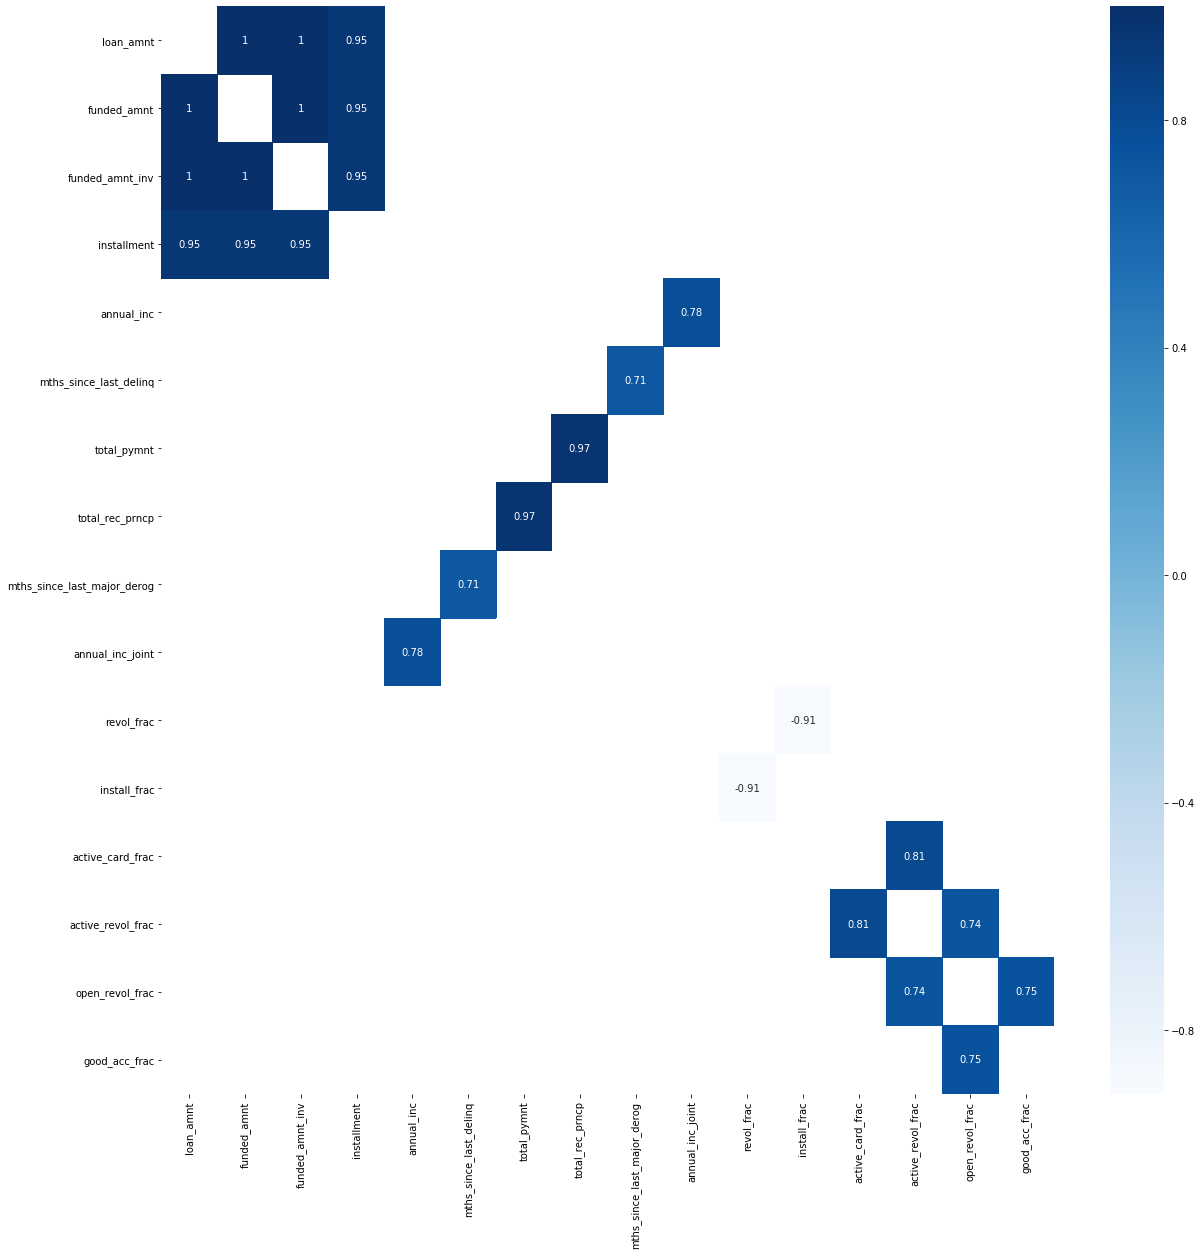

In [8]:
plot_corr(first_drop_df,threshold=0.7,size=20)

#### remove funded amount because they are basically the same as loan_amnt
#### remove installment because it is the same as loan amnt * int_rate
#### create a column: fully_invested = True if loan_amnt == funded_amnt_inv, else false. 

In [9]:
(first_drop_df.loc[:,'funded_amnt']!=first_drop_df.loc[:,'funded_amnt_inv']).sum()

151111

In [10]:
(first_drop_df.loc[:,'loan_amnt']!=first_drop_df.loc[:,'funded_amnt_inv']).sum()

151501

In [11]:
(first_drop_df.loc[:,'loan_amnt']!=first_drop_df.loc[:,'funded_amnt']).sum()

2065

In [12]:
first_drop_df['fully_invested']=first_drop_df.loc[:,'loan_amnt']==first_drop_df.loc[:,'funded_amnt_inv']
second_drop_df=first_drop_df.drop(['funded_amnt','funded_amnt_inv','installment'],axis=1)

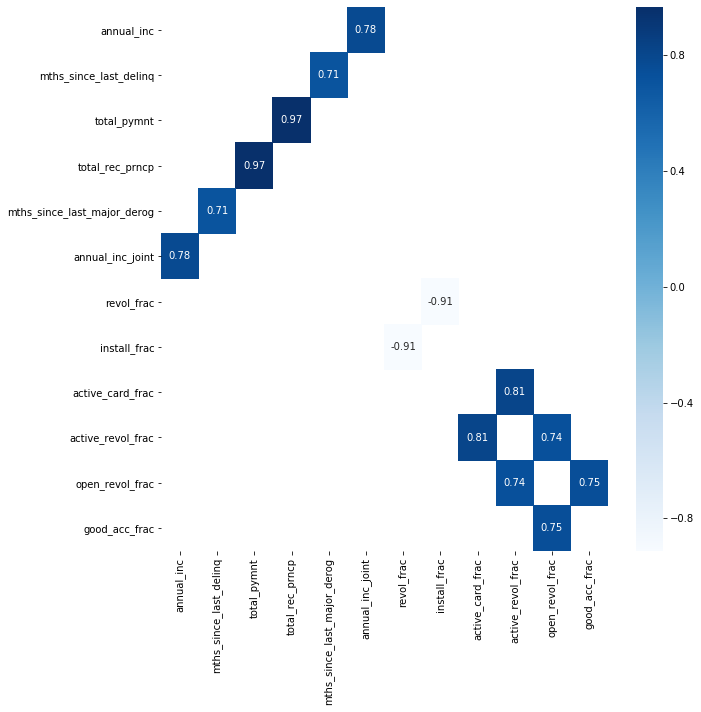

In [13]:
plot_corr(second_drop_df,threshold=0.7,size=10)

In [14]:
second_drop_df.shape

(2260668, 82)

In [15]:
df_number = second_drop_df.select_dtypes(include = 'number')
df_object = second_drop_df.select_dtypes(include = 'object')
df_category = second_drop_df.select_dtypes(include = 'category')
df_boolean = second_drop_df.select_dtypes(include = 'bool')
df_datetime = second_drop_df.select_dtypes(include = 'datetime')
df_timedelta = second_drop_df.select_dtypes(include = 'timedelta')
#######################################################
nominal_var=list(df_object.columns)
ordinal_var=list(df_number.columns)
continuous_var=list(df_number.columns)
time_var=list(df_datetime.columns)

In [16]:
print(len(np.array(nominal_var)))
print(len(np.array(continuous_var)))

19
62


In [ ]:
second_drop_df.to_csv('lean_df_3.csv')

In [ ]:
second_drop_df.head(10)

In [ ]:
second_drop_df.loan